## Васильев Семён. 520 группа

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
var = 3

In [3]:
data = pd.read_csv('var_3.csv')

In [4]:
data

,x,y
0,0.953015,-0.515325
1,0.535038,-0.527358
2,-0.583636,-1.278695
3,-2.161461,3.340212
4,-1.320213,-1.102230
...,...,...
288,2.373837,-0.659048
289,-2.557972,-1.033015
290,1.233695,0.210893
291,0.977717,-0.261198


In [5]:
F1 = np.array([
    [-0.1, 0.1, 0.0],
    [ 0.1, 0.1, 0.3],
    [ 0.1, 0.3, 0.2]
])

F2 = np.array([
    [ 0.2, 0.3, 0.2],
    [ 0.0, 0.3, 0.2],
    [ 0.6,-0.4, 0.6]
])

# F1 = np.array([
#     [ 0.5,-0.4,-0.2],
#     [ 0.4, 0.4, 0.4],
#     [ 0.1, 0.3, 0.2]
# ])

# F2 = np.array([
#     [-0.4,-0.3,-0.2],
#     [ 0.5, 0.3, 0.2],
#     [ 0.3,-0.2, 0.2]
# ])

In [6]:
F = np.zeros((2 * 3, 2 * 3))
F[:3, :3] = F1
F[:3, 3:] = F2
F[3:, :3] = np.eye(3)
F

array([[-0.1,  0.1,  0. ,  0.2,  0.3,  0.2],
       [ 0.1,  0.1,  0.3,  0. ,  0.3,  0.2],
       [ 0.1,  0.3,  0.2,  0.6, -0.4,  0.6],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ]])

In [7]:
modules = []
for ev in np.linalg.eig(F)[0]:
    modules.append(np.abs(ev))
modules

[1.053492835952643,
 0.5075404214590531,
 0.5075404214590531,
 0.8544224706152012,
 0.47356425254118495,
 0.47356425254118495]

In [8]:
stat = '"Yes"'
for m in modules:
    if m >= 1:
        stat = '"No"'
stat

'"No"'

In [9]:
crosscorr = np.correlate(data.x.values, data.y.values, mode='full')

In [10]:
crosscorr

array([-1.01903537e+00, -8.21028893e-01,  6.85301166e-01,  1.59199924e+00,
        6.72370667e-01, -3.67446404e-01,  1.10413185e+00,  5.64044586e-01,
       -2.51458032e+00, -2.00204772e+00,  3.04656405e+00,  5.40443140e+00,
        5.45288870e-01, -3.06961231e+00, -4.44394014e-02,  3.84809579e+00,
        6.54739234e-01, -1.91107171e+00,  1.66912925e+00, -1.51586373e+00,
       -6.90991061e+00,  3.02298517e-01,  6.89976446e+00,  3.94285366e+00,
       -2.86325635e+00, -4.53503634e+00,  3.72932010e+00,  1.08068733e+00,
       -1.96603780e+00, -5.68787586e+00,  2.84706783e+00,  6.34909924e+00,
        5.67212297e+00, -1.89640741e+00,  1.67576184e+00, -9.17238471e-01,
       -5.56584170e+00,  8.06369805e-01,  8.71031426e+00,  6.46038912e-01,
       -6.80135094e+00, -5.99385971e-01, -7.05193973e+00, -2.76629124e+00,
        4.33971536e+00,  1.45192948e+01,  3.39865236e+00, -1.37412920e+01,
       -7.98596482e+00, -5.59548436e+00,  1.72207566e+01,  5.70610253e+00,
        1.32716225e+01, -

In [11]:
corr = signal.correlate(data.x.values, data.y.values)
lags = signal.correlation_lags(len(data.x.values), len(data.y.values))

In [12]:
lags

array([-292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282,
       -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271,
       -270, -269, -268, -267, -266, -265, -264, -263, -262, -261, -260,
       -259, -258, -257, -256, -255, -254, -253, -252, -251, -250, -249,
       -248, -247, -246, -245, -244, -243, -242, -241, -240, -239, -238,
       -237, -236, -235, -234, -233, -232, -231, -230, -229, -228, -227,
       -226, -225, -224, -223, -222, -221, -220, -219, -218, -217, -216,
       -215, -214, -213, -212, -211, -210, -209, -208, -207, -206, -205,
       -204, -203, -202, -201, -200, -199, -198, -197, -196, -195, -194,
       -193, -192, -191, -190, -189, -188, -187, -186, -185, -184, -183,
       -182, -181, -180, -179, -178, -177, -176, -175, -174, -173, -172,
       -171, -170, -169, -168, -167, -166, -165, -164, -163, -162, -161,
       -160, -159, -158, -157, -156, -155, -154, -153, -152, -151, -150,
       -149, -148, -147, -146, -145, -144, -143, -1

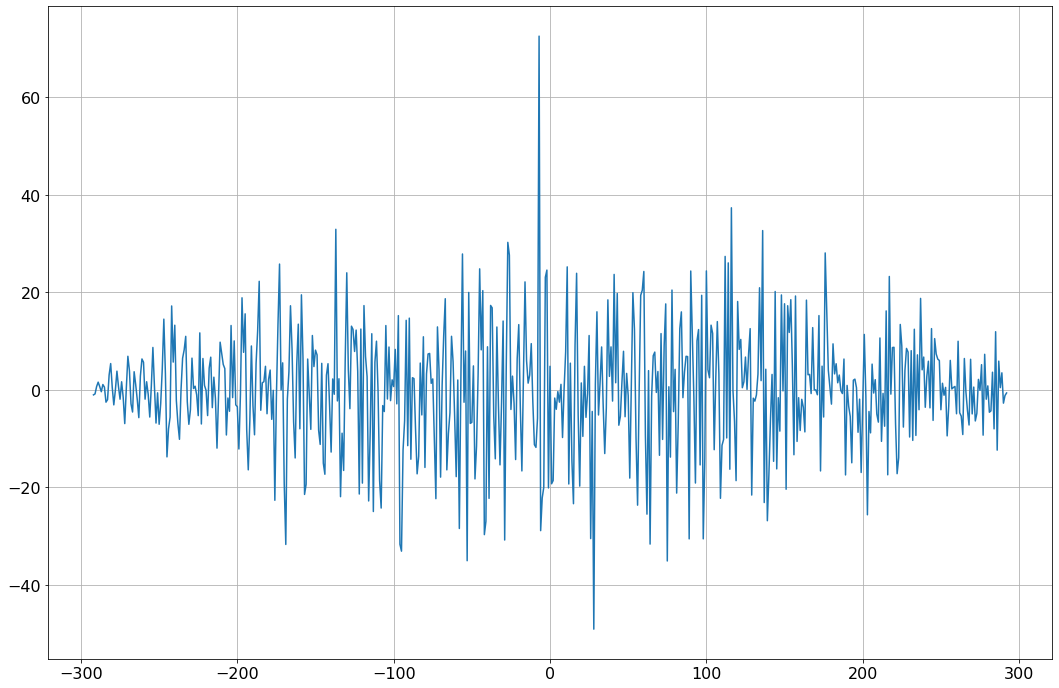

In [13]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(18, 12))
plt.grid()

plt.plot(lags, corr)

In [14]:
lag = lags[np.abs(corr).argmax()]
if lag <= 0:
    fast = 1
else:
    fast = 2
lag = lag

In [15]:
res = [str(var)] + list(map(str, modules)) + [stat] + [str(lag)] + [str(fast)]
res = ','.join(res)
res

'3,1.053492835952643,0.5075404214590531,0.5075404214590531,0.8544224706152012,0.47356425254118495,0.47356425254118495,"No",-7,1'

In [16]:
with open('09_res.csv', 'w') as f:
    f.write(res)